In [140]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from trapezoidalMatrixFree import trapezoidalMatrixFree
from trapezoidal import rk_integrator
from scipy.interpolate import griddata

%load_ext autoreload
%autoreload 2

def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
        
        
def plot_results(x, L_list, tlist):
    n_t = x[:,2:]
    plt.pcolormesh(tlist, L_list, n_t.T, shading='nearest')
    plt.ylabel('L (particle size)')
    plt.xlabel('time')
    plt.colorbar()
    plt.show()

    plt.plot(tlist, x[:,0]) 
    plt.title('supersaturation')
    plt.xlabel('t')
    plt.show()

    plt.plot(tlist, x[:,1]) 
    plt.title('volume')
    plt.xlabel('t')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
L_list = np.linspace(0,0.01, 100)  # uniform dL assumed below
tlist = np.linspace(0,30,100)


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution
x0 = np.hstack([S0, V0, n0])

# target parameters we will try to recover
p = {
    'L_list' : L_list,
    'E' :  1e-6, #evaporation rate
    'rho' : 1200, # density of the crystal
    'k_v' : 1, #goes in N_C, volumetric shape factor
    'k_g' : 1e-3, #growth rate constant m/s
    'g' : 1, #power constant for growth
    'k_N' : 1e5, #nucleation rate constant 
    'alpha' :2, #power constant for nucleation
    'weno': False  # use weno or not for differentiation w.r.t. L
     }


T = tlist[-1]
# deltat = tlist[1] - tlist[0]
alpha = 0.7  #determines adaptive timestep scaling

x_t, tlist=trapezoidalMatrixFree(evalf,x0, alpha, tlist[0], T, p, errf=1e-6, errDeltax=1e-6, relDeltax=1e-6, MaxIter=20,tolrGCR=1e-4,epsMF=1e-6)
x_t = np.array(x_t)

t: 9.899494936116692e-06
t: 2.198188431350124e-05
t: 4.027473434265727e-05
t: 7.014469083625152e-05
t: 0.00012020688107911167
t: 0.0002048554500986078
t: 0.00034837626167080293
t: 0.0005918099481699272
t: 0.0010043820954700041
t: 0.0017023176213313953
t: 0.002879126441860118
t: 0.004852455155838396
t: 0.008131535216184333
t: 0.013501725226331768
t: 0.02210166612252927
t: 0.035433319966966366
t: 0.05522779666597209
t: 0.0831663382536929
t: 0.12062729138284226
t: 0.16867585395521317
t: 0.22829791545057032
t: 0.30069576876732323
t: 0.3875229906471671
t: 0.4910567421691286
t: 0.6143389099147161
t: 0.7612914529014917
t: 0.936787831281279
t: 1.1466886085977923
t: 1.397933901588988
t: 1.6987908156223561
t: 2.058854809287868
t: 2.4844692973884297
t: 2.9408426663841767
t: 3.3173125862374255
t: 3.616353670662629
t: 3.8866885094754866
t: 4.162302160167467
t: 4.481812776983513
t: 4.929302239265437
t: 5.86219126985266
t: 13.954931346879311
t: 28.86970977339137
t: 30.0


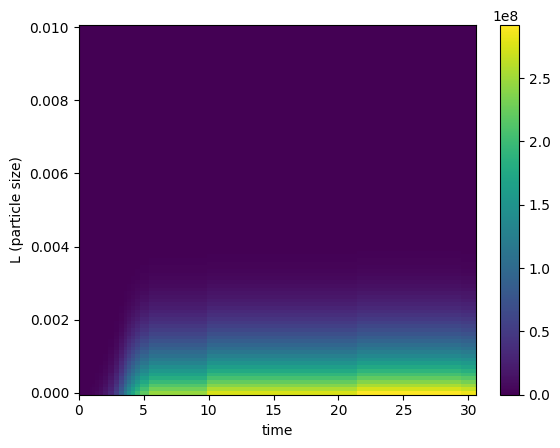

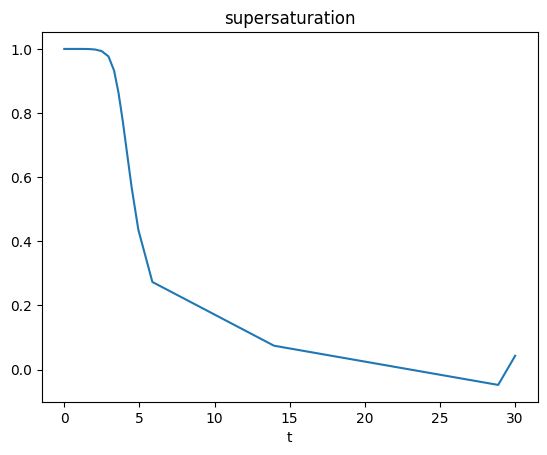

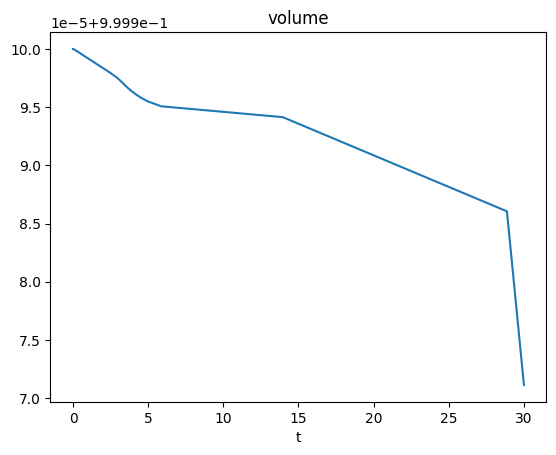

In [165]:
plot_results(x_t, L_list, tlist)

  0%|          | 0/100 [00:00<?, ?it/s]

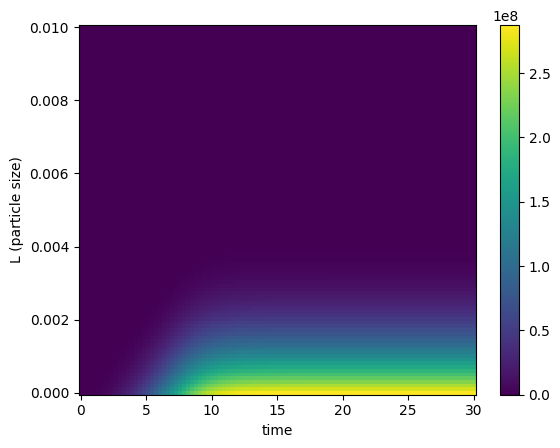

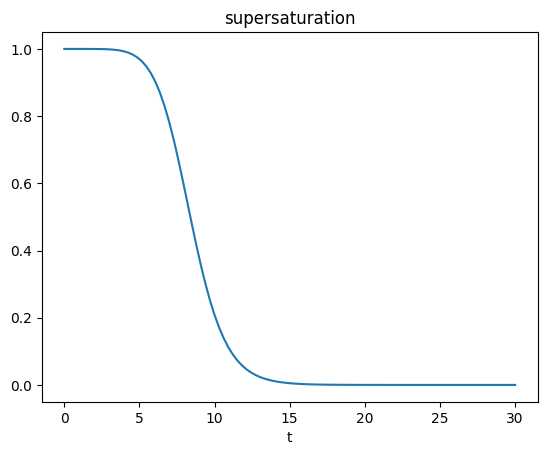

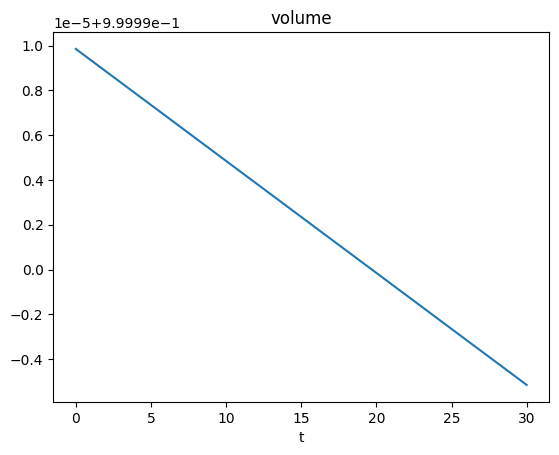

In [166]:
#compare with rk4
tlist = np.linspace(0,30,100)

x_t = rk_integrator(x0, tlist, p)
plot_results(x_t, L_list, tlist)